In [389]:
import os
import warnings
from glob import glob
from itertools import cycle
import re

import matplotlib.pyplot as plt
plt.style.use("grayscale")
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

import pandas as pd
warnings.filterwarnings('ignore')

In [390]:
def removed_outliers(df, column, level=3):
    return df[((df[column] - df[column].mean()) / df[column].std()).abs() < level]


In [391]:
def read_ca_size_data(dir_path = "results/paper/ca_size", test_name="standard", obsolete=False):
    df = pd.DataFrame()
    df["ca_size"] = range(4000,9000,1000)

    files = sorted(glob(f"{dir_path}/{test_name}/*{4000}*"))
    for j,file in enumerate(files):
        params_match = re.search(r"\d", file)
        file_name = os.path.basename(file[:params_match.start()])
        file_name = file_name[:params_match.start()]
        file_name = file_name.replace("coverage_","")
        file_data=[]
        for i, ca_size in enumerate(df.ca_size):
            files = glob(f"{dir_path}/{test_name}/*{file_name}{ca_size}*")
            if len(files) > 1:
                raise Exception(f"Should match only one file instead of {len(files)}. Regex invalid matches files:{files}")
            if obsolete:
                file_df = pd.read_csv(files[0], skiprows=2, names=["ac_coverage",'iter_time', 'x','y','z'])
            else:
                file_df = pd.read_csv(files[0], skiprows=2, names=["ac_coverage",'iter_time'])

            file_data.append(file_df["iter_time"].cumsum().iloc[-1] / 10**9)
        df[file_name]=file_data

    return df

In [392]:
def create_ca_size_plot(df, clean=3 ):
    fig, ax = plt.subplots(figsize=(15, 6))

    if clean != -1:
        for test in df:
            df = removed_outliers(df, test, level=clean)
            df.reset_index(drop=True, inplace=True)

    ca_size = df['ca_size']
    df.drop(['ca_size'], axis=1, inplace=True)

    ax.set_xlabel('CA dimension')
    ax.set_ylabel('Elapsed time [s]')

    line_styles = cycle([":", "--", "-.", "-"])
    marker_styles = cycle(("o", "x", "*", "+", "D", "X", ".", "s"))
    for file_name in df:
        ax.plot(ca_size,
                df[file_name],
                linestyle=next(line_styles),
                marker=next(marker_styles),
                label=file_name,
                )

    plt.legend()
    return fig

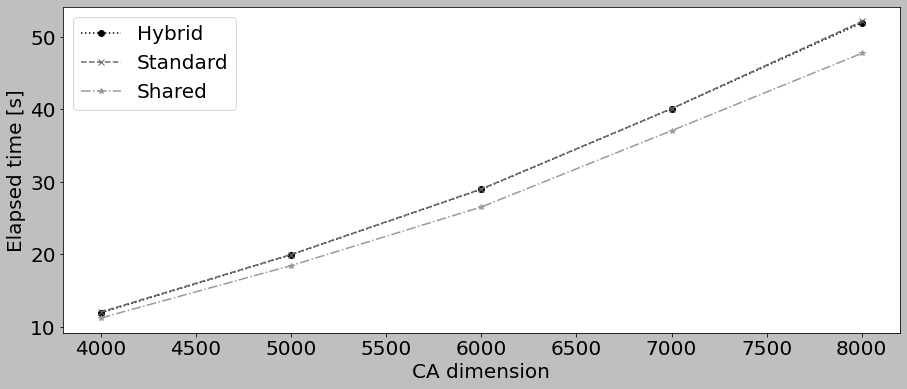

In [393]:
df=read_ca_size_data(obsolete=True)
df = df.rename(columns={
     "u_hybrid_": "Hybrid",
     "u_standard_": "Shared",
     "u_shared_": "Standard",
})
create_ca_size_plot(df)
plt.savefig("standard.pdf")

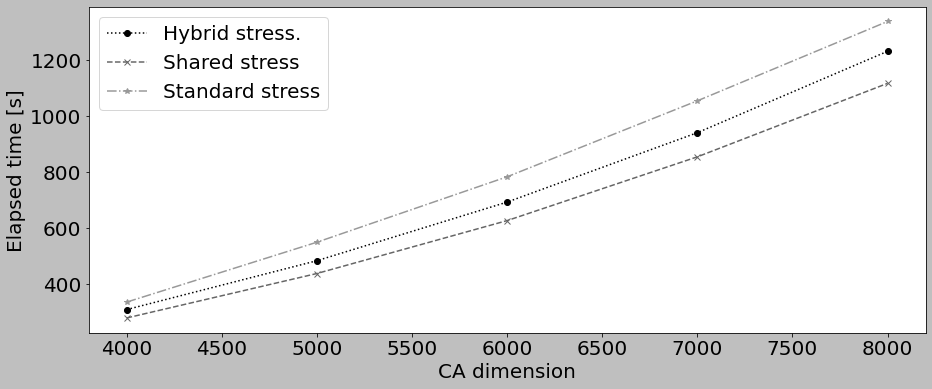

In [394]:
df=read_ca_size_data(test_name="standard_stress", obsolete=True)
df = df.rename(columns={
     "u_hybrid_stress_": "Hybrid stress.",
     "u_standard_stress_": "Standard stress",
     "u_shared_stress_": "Shared stress",
})
create_ca_size_plot(df)
plt.savefig("standard_stress.pdf")

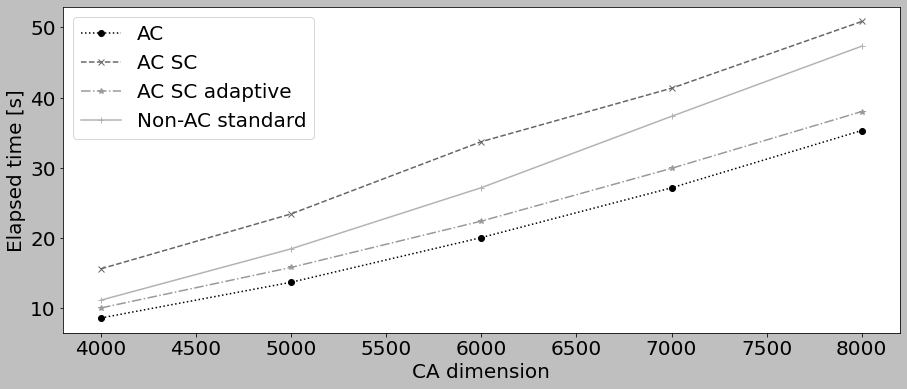

In [395]:
df=read_ca_size_data(test_name="active_cells", obsolete=True)
df = df.rename(columns={
     "ac_u_": "AC",
     "ac_u_sc_adaptive_": "AC SC adaptive",
     "ac_u_sc_": "AC SC",
     "u_standard_": "Non-AC standard",
})

create_ca_size_plot(df)
plt.savefig("active_cells_ca_size.pdf")

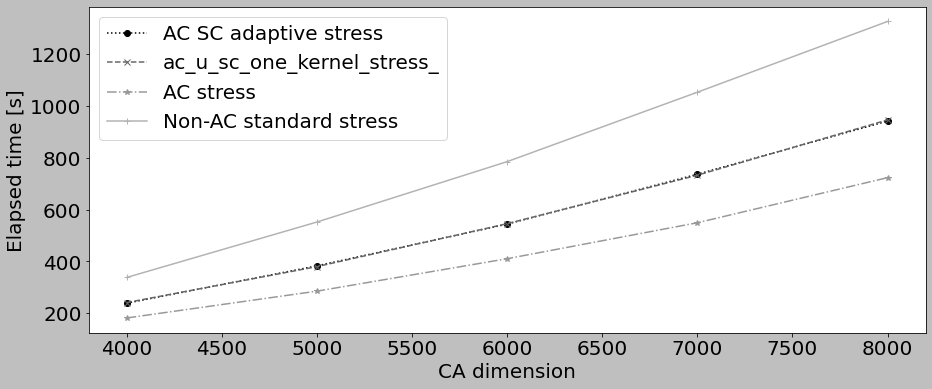

In [396]:
df=read_ca_size_data(test_name="ac_stress", obsolete=True)

df = df.rename(columns={
     "ac_u_stress_": "AC stress",
     "ac_u_sc_adaptive_stress_": "AC SC adaptive stress",
     "ac_u_sc_stress_": "AC SC stress",
     "u_standard_stress_": "Non-AC standard stress",
})

create_ca_size_plot(df)
plt.savefig("active_cells_ca_size_stress.pdf")

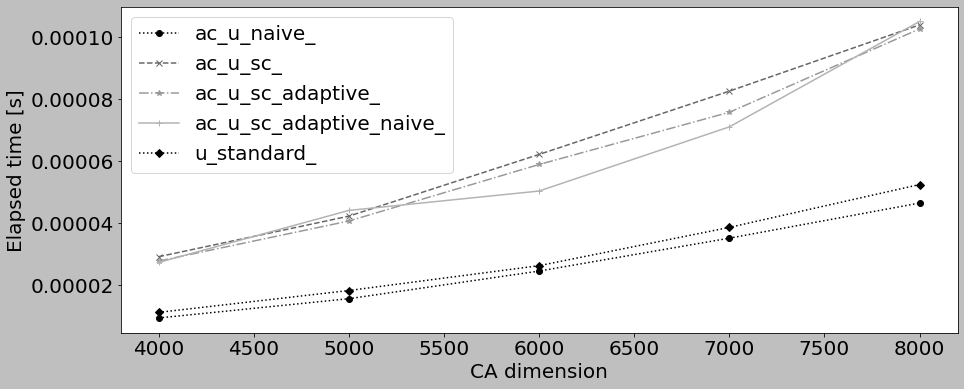

In [397]:
df=read_ca_size_data(dir_path="results/paper/ca_size/active_cells_extreme", test_name="normal")

df = df.rename(columns={
     "ac_u_stress_": "AC stress",
     "ac_u_sc_adaptive_stress_": "AC SC adaptive stress",
     "ac_u_sc_stress_": "AC SC stress",
     "u_standard_stress_": "Non-AC standard stress",
})

create_ca_size_plot(df)
plt.savefig("active_cells_ca_size_extreme.pdf")

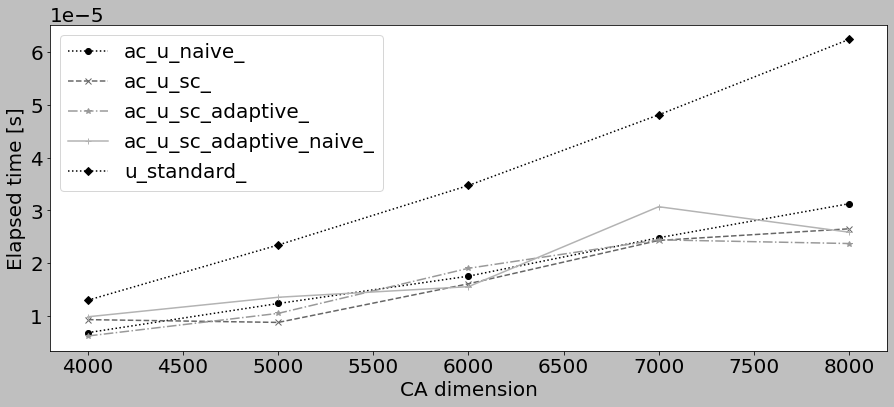

In [398]:
df=read_ca_size_data(dir_path="results/paper/ca_size/active_cells_extreme", test_name="low")
df = df.rename(columns={
     "ac_u_stress_": "AC stress",
     "ac_u_sc_adaptive_stress_": "AC SC adaptive stress",
     "ac_u_sc_stress_": "AC SC stress",
     "u_standard_stress_": "Non-AC standard stress",
})

create_ca_size_plot(df)
plt.savefig("active_cells_ca_size_extreme.pdf")